# Proyecto: Clasificación de Actividades

## Importación de DataFrame

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy as sci

DIR='C:\Projects\Physical_activity_classifier/Smartphone_Dataset'

def data_extractor(DIR):
    dataset,error=[],[]
    Activities=['bike','climbing','descending','gymbike','jumping','running','standing','treadmill','walking']
    for suj in range(1,10):#######################10
        print('Extrayendo datos S0{}'.format(suj))
        new_suj=[[],[],[],[],[],[],[],[],[]]
        for act in range(0,9):###################9
            new_act=[[],[],[],[],[]]
            for k in range(1,6):
                path=DIR+'/S0'+str(suj)+'/'+Activities[act]+str(k)+'.csv'
                try:
                    df=pd.read_csv(path,header=None)
                    data=df.as_matrix()
                    new_act[k-1]=data
                except FileNotFoundError :
                    estr=Activities[act]+str(k)
                    error.append(estr)
            new_suj[act]=new_act
        dataset.append(new_suj)
    return dataset

In [2]:
def feature_extractor(dataset,data_size):
    x_data,y_data,error=[],[],[]
    print('Calculando características ...')
    for suj in range(0,9):#######################10
        for act in range(0,9):###################9
            for k in range(0,5):
                try:
                    data=dataset[suj][act][k]
                    groups=len(data)//data_size
                    new_data=[]
                    for g in range(0,groups):
                        new_data.append(data[g*data_size:(g+1)*data_size])
                    for g in range(0,len(new_data)):
                        final_data=[]
                        sensors=[[],[],[],[],[],[],[],[],[]]
                        for i in range(0,data_size):
                            for j in range(0,9):
                                sensors[j].append(new_data[g][i][j])

                        for j in range(0,9):
                            final_data.append(np.mean(sensors[j]))#Mean
                            final_data.append(np.var(sensors[j]))#Var
                            final_data.append(np.min(sensors[j]))#Min
                            final_data.append(np.max(sensors[j]))#Max
                            final_data.append(np.max(sensors[j])-np.min(sensors[j]))#Range
                            RMS=0
                            for i in range(0,data_size):
                                RMS+=np.sqrt((1/data_size)*sensors[j][i]*sensors[j][i])
                            final_data.append(RMS)#RMS
                            final_data.append(sci.stats.kurtosis(sensors[j]))#Kurtosis

                        #-------------------Entropy----------------------
                        for j in range(0,9):
                            H=sci.stats.entropy(sensors[j])
                            #final_data.append(H)    
                        #-------------------EnergyExpenditure----------------------
                        for j in range(0,3):
                            EE=0
                            for i in range(0,data_size):
                                EE+=(1/data_size)*np.sqrt(sensors[0+j*3][i]*sensors[0+j*3][i]+sensors[1+j*3][i]*sensors[1+j*3][i]+sensors[2+j*3][i]*sensors[2+j*3][i])
                            final_data.append(EE)#EE
                            SMA=0
                            for i in range(0,data_size):
                                SMA+=(1/data_size)*(np.abs(sensors[0+j*3][i])+np.abs(sensors[1+j*3][i])+np.abs(sensors[2+j*3][i]))
                            final_data.append(SMA)#SMA    

                        x_data.append(final_data)
                        y_data.append(act)

                except IndexError :
                    estr='actividad '+str(act)+','+str(k)+ 'doesn t exist'
                    error.append(estr)
    return x_data,y_data

In [3]:
dataset=data_extractor(DIR)
x_data,y_data=feature_extractor(dataset,500)
    
print('Cantidad de datos: {}'.format(len(x_data)))
print('Cantidad de caracteristicas: {}'.format(len(x_data[0])))

x,x_test,y,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True)

Extrayendo datos S01
Extrayendo datos S02
Extrayendo datos S03
Extrayendo datos S04
Extrayendo datos S05
Extrayendo datos S06
Extrayendo datos S07
Extrayendo datos S08
Extrayendo datos S09
Calculando características ...
Cantidad de datos: 383
Cantidad de caracteristicas: 69


In [6]:
sensor_names=['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz']
sensors_names=['Acc','Gyr','Mag']
fnames=[]
for j in range(0,9):
    fnames.append(sensor_names[j]+'Mean')
    fnames.append(sensor_names[j]+'Var')
    fnames.append(sensor_names[j]+'Min')
    fnames.append(sensor_names[j]+'Max')
    fnames.append(sensor_names[j]+'Range')
    fnames.append(sensor_names[j]+'RMS')
    fnames.append(sensor_names[j]+'Kurt')
for j in range(0,3):
    fnames.append(sensors_names[j]+'EE')
    fnames.append(sensors_names[j]+'SMA')
print(fnames)
print('Cantidad de caracteristicas: {}'.format(len(fnames)))
Activities=['bike','climbing','descending','gymbike','jumping','running','standing','treadmill','walking']

['AxMean', 'AxVar', 'AxMin', 'AxMax', 'AxRange', 'AxRMS', 'AxKurt', 'AyMean', 'AyVar', 'AyMin', 'AyMax', 'AyRange', 'AyRMS', 'AyKurt', 'AzMean', 'AzVar', 'AzMin', 'AzMax', 'AzRange', 'AzRMS', 'AzKurt', 'GxMean', 'GxVar', 'GxMin', 'GxMax', 'GxRange', 'GxRMS', 'GxKurt', 'GyMean', 'GyVar', 'GyMin', 'GyMax', 'GyRange', 'GyRMS', 'GyKurt', 'GzMean', 'GzVar', 'GzMin', 'GzMax', 'GzRange', 'GzRMS', 'GzKurt', 'MxMean', 'MxVar', 'MxMin', 'MxMax', 'MxRange', 'MxRMS', 'MxKurt', 'MyMean', 'MyVar', 'MyMin', 'MyMax', 'MyRange', 'MyRMS', 'MyKurt', 'MzMean', 'MzVar', 'MzMin', 'MzMax', 'MzRange', 'MzRMS', 'MzKurt', 'AccEE', 'AccSMA', 'GyrEE', 'GyrSMA', 'MagEE', 'MagSMA']
Cantidad de caracteristicas: 69


In [7]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = 100 * cm / cm.sum(1)
    plt.figure(figsize=(8,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import time
def NN_train(xdata,ydata,hl_size=10,act='relu'):
    clf = MLPClassifier(activation=act,solver='lbfgs', hidden_layer_sizes=hl_size,
    early_stopping = True, validation_fraction = 0.25);
    
    xtrain,xval,ytrain,yval=train_test_split(xdata,ydata,random_state=clf.random_state,
                                                       test_size=clf.validation_fraction)
    clf.fit(xdata, np.ravel(ydata))
    return [clf,xtrain,xval,ytrain,yval]

def NN(x,y,hl_s,plot=True):
    print('-------------------------------------------------')
    print('Neural Network')
    print('-------------------------------------------------')
    best_cm=None
    best_acc,best_hls=0,0
    for i in range(0,len(hl_s)):
        clf,x_train,x_val,y_train,y_val=NN_train(x,y,hl_size=hl_s[i])
        y_pred=clf.predict(x_val)
        c_m=confusion_matrix(np.ravel(y_val), y_pred)
        acc=accuracy_score(y_val, y_pred)
        if acc>best_acc:
            best_acc=acc
            best_cm=c_m
            best_hls=hl_s[i]
    if(plot):
        title='Matriz de Confusión Red Neuronal con '+str(best_hls)+ ' neuronas'
        #print('Tiempo de entrenamiento: {}s'.format(dt))
        plot_confusion_matrix(best_cm,Activities,normalize=False,title=title)
    print('Mejor configuración: Tamaño capa oculta {}'.format(best_hls))
    print('Clasificaciones exitosas: {}%'.format(best_acc*100))
    return x_train,x_val,y_train,y_val

def svm_poly(x_train,y_train,x_test,y_test,degs=[1],plot=True):
    best_cm=None
    best_acc,best_deg=0,0
    for i in range(0,len(degs)):
        clf = SVC(kernel='poly',degree=degs[i])
        clf.fit(x_train, y_train)  
        y_pred=clf.predict(x_test)
        c_m=confusion_matrix(np.ravel(y_test), y_pred)
        acc=accuracy_score(np.ravel(y_test), y_pred)
        if acc>best_acc:
            best_acc=acc
            best_cm=c_m
            best_deg=degs[i]
    
    print('-------------------------------------------------')
    print('Support Vector Machine')
    print('-------------------------------------------------')
    if (plot):
        title='Matriz de Confusión SVM con kernel polinomial grado '+str(best_deg)
        plot_confusion_matrix(best_cm,Activities,title=title)
    print('Mejor configuración: Polinomio Grado {}'.format(best_deg))
    print('Clasificaciones exitosas: {}%'.format(acc*100))

def NB(x_train,y_train,x_val,y_val,plot=True):
    clf = GaussianNB().fit(x_train, y_train)
    y_pred=clf.predict(x_val_n)
    c_m=confusion_matrix(np.ravel(y_val), y_pred)
    acc=accuracy_score(np.ravel(y_val), y_pred)
    print('-------------------------------------------------')
    print('Gaussian Naive Bayes')
    print('-------------------------------------------------')
    if(plot):
        title='Matriz de Confusión Clasificador Naive Bayes Gaussiano'
        plot_confusion_matrix(c_m,Activities,title=title)
    print('Clasificaciones exitosas: {}%'.format(acc*100))

In [31]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
def f_selection(k,x_train,y_train,x,fnames,plot=False):
    sel = SelectKBest(score_func=mutual_info_classif,k=k).fit(x_train, y_train)
    x2= sel.transform(x)
    print('feature size: {} ---> {}'.format(len(x[0]),len(x2[0])))
    if (plot):
        scores=sel.scores_
        feature_s=len(x[0])
        features=np.arange(0,feature_s,1)
        plt.figure(figsize=(15,15))
        plt.barh(range(feature_s),scores)
        plt.yticks(range(feature_s),fnames)
        plt.show()

    mask=sel.get_support()
    fnames2=get_fnames(fnames,mask)
    print('características seleccionadas:')
    print(fnames2)
    return x2,fnames2

## Clasificadores

-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 500
Clasificaciones exitosas: 100.0%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 64.93506493506493%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 88.31168831168831%


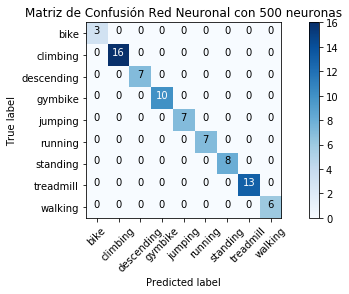

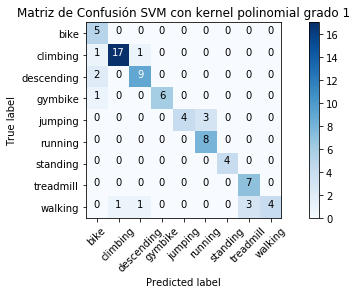

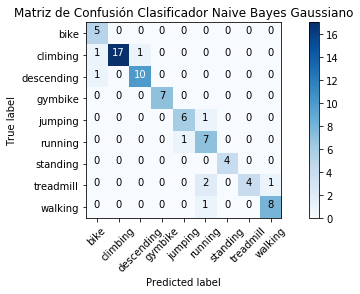

In [9]:
hl_s=[10,50,100,500,[10,10],[50,50],[100,100],[500,500]] #hl_size_op=5000#(28+10)//2
x_train,x_val,y_train,y_val=NN(x,y,hl_s)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

degs=[1,2,3]
svm_poly(x_train_n,y_train,x_val_n,y_val,degs)

NB(x_train_n,y_train,x_val_n,y_val)

## Selección de características

In [10]:
def get_fnames(fnames,mask):
    fnames2=[]
    for i in range(0,len(fnames)):
        if(mask[i]):
            fnames2.append(fnames[i])
    return fnames2

feature size: 69 ---> 30


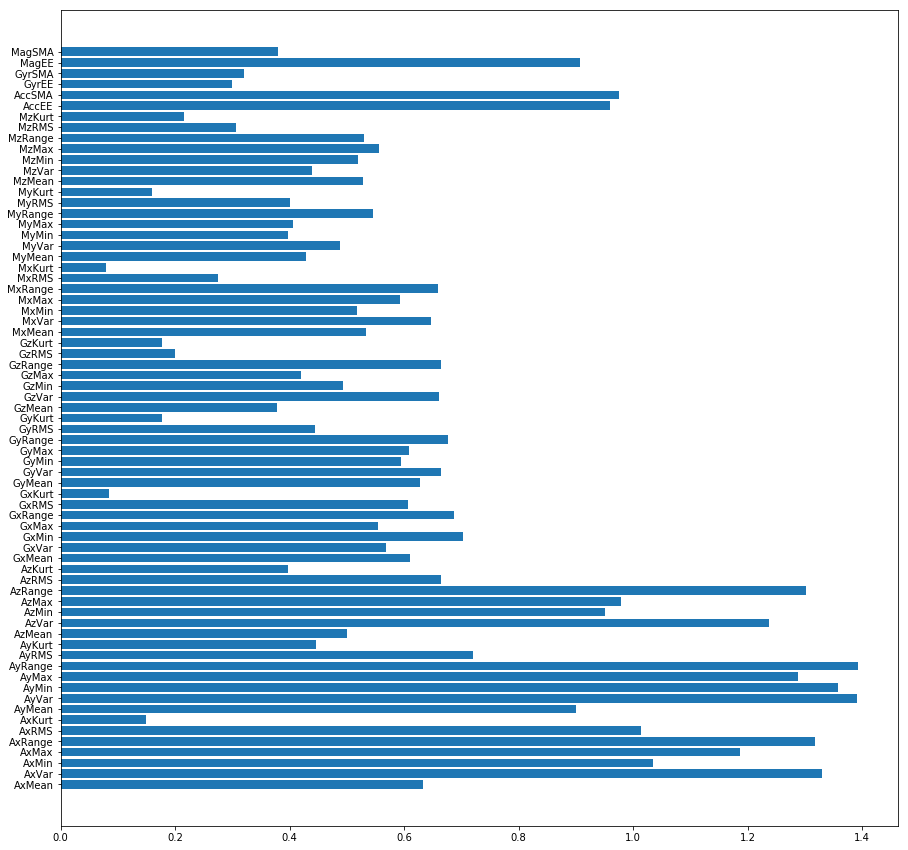

características seleccionadas:
['AxMean', 'AxVar', 'AxMin', 'AxMax', 'AxRange', 'AxRMS', 'AyMean', 'AyVar', 'AyMin', 'AyMax', 'AyRange', 'AyRMS', 'AzVar', 'AzMin', 'AzMax', 'AzRange', 'AzRMS', 'GxMean', 'GxMin', 'GxRange', 'GyMean', 'GyVar', 'GyRange', 'GzVar', 'GzRange', 'MxVar', 'MxRange', 'AccEE', 'AccSMA', 'MagEE']


In [26]:
x2,fnames2=f_selection(30,x_train,y_train,x,fnames,plot=True)

In [27]:
x_train,x_val,y_train,y_val=NN(x2,y,hl_s,plot=False)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

svm_poly(x_train_n,y_train,x_val_n,y_val,degs,plot=False)
NB(x_train_n,y_train,x_val_n,y_val,plot=False)

-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 100
Clasificaciones exitosas: 88.25065274151436%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 79.89556135770235%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 79.37336814621409%


## Tercera Selección de Caracteríticas

In [33]:
x3,fnames3=f_selection(10,x_train,y_train,x2,fnames2)

feature size: 30 ---> 10
características seleccionadas:
['AxVar', 'AxMin', 'AxMax', 'AxRange', 'AyVar', 'AyMin', 'AyMax', 'AyRange', 'AzVar', 'AzRange']


In [34]:
x_train,x_val,y_train,y_val=NN(x3,y,hl_s,plot=False)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

svm_poly(x_train_n,y_train,x_val_n,y_val,degs,plot=False)
NB(x_train_n,y_train,x_val_n,y_val,plot=False)

-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 100
Clasificaciones exitosas: 85.6396866840731%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 3
Clasificaciones exitosas: 74.1514360313316%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 76.50130548302873%


# Extracción de Datos (tamaño 250)

In [35]:
x_data,y_data=feature_extractor(dataset,250)
print('Cantidad de datos: {}'.format(len(x_data)))
print('Cantidad de caracteristicas: {}'.format(len(x_data[0])))
x,x_test,y,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True)

Calculando características ...
Cantidad de datos: 766
Cantidad de caracteristicas: 69


In [36]:
x_train,x_val,y_train,y_val=NN(x,y,hl_s,plot=False)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

degs=[1,2,3]
svm_poly(x_train_n,y_train,x_val_n,y_val,degs,plot=False)

NB(x_train_n,y_train,x_val_n,y_val,plot=False)

-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta [50, 50]
Clasificaciones exitosas: 95.42483660130719%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 76.47058823529412%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 90.19607843137256%


In [37]:
x2,fnames2=f_selection(10,x_train,y_train,x,fnames)

feature size: 69 ---> 10
características seleccionadas:
['AxVar', 'AxMin', 'AxMax', 'AxRange', 'AyVar', 'AyMin', 'AyMax', 'AyRange', 'AzVar', 'AzRange']


In [38]:
x_train,x_val,y_train,y_val=NN(x2,y,hl_s,plot=False)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

svm_poly(x_train_n,y_train,x_val_n,y_val,degs,plot=False)
NB(x_train_n,y_train,x_val_n,y_val,plot=False)

-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 100
Clasificaciones exitosas: 88.23529411764706%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 66.66666666666666%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 78.43137254901961%


# Extracción de Datos (tamaño 100)

In [39]:
x_data,y_data=feature_extractor(dataset,100)
print('Cantidad de datos: {}'.format(len(x_data)))
print('Cantidad de caracteristicas: {}'.format(len(x_data[0])))
x,x_test,y,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True)

Calculando características ...
Cantidad de datos: 1915
Cantidad de caracteristicas: 69


In [40]:
hl_s=[50,100,[50,50]]
x_train,x_val,y_train,y_val=NN(x,y,hl_s,plot=False)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

svm_poly(x_train_n,y_train,x_val_n,y_val,degs,plot=False)

NB(x_train_n,y_train,x_val_n,y_val,plot=False)

-------------------------------------------------
Neural Network
-------------------------------------------------
Mejor configuración: Tamaño capa oculta 100
Clasificaciones exitosas: 94.25587467362925%
-------------------------------------------------
Support Vector Machine
-------------------------------------------------
Mejor configuración: Polinomio Grado 1
Clasificaciones exitosas: 91.12271540469973%
-------------------------------------------------
Gaussian Naive Bayes
-------------------------------------------------
Clasificaciones exitosas: 89.29503916449086%


In [41]:
x,fnames=f_selection(10,x_train,y_train,x,fnames)

feature size: 69 ---> 10
características seleccionadas:
['AxVar', 'AxMax', 'AxRange', 'AxRMS', 'AyVar', 'AyMin', 'AyMax', 'AyRange', 'AzVar', 'AzRange']


In [42]:
x_train,x_val,y_train,y_val=NN(x2,y,hl_s,plot=False)

std_scale=skl.preprocessing.StandardScaler().fit(x_train)
x_train_n = std_scale.transform(x_train)
x_val_n = std_scale.transform(x_val)

svm_poly(x_train_n,y_train,x_val_n,y_val,degs,plot=False)
NB(x_train_n,y_train,x_val_n,y_val,plot=False)

-------------------------------------------------
Neural Network
-------------------------------------------------


ValueError: Found input variables with inconsistent numbers of samples: [612, 1532]